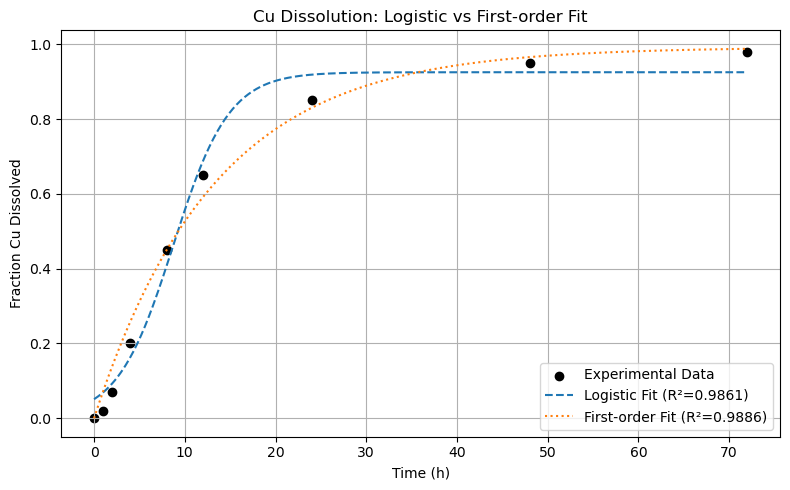

Logistic model parameters:
  L  = 0.9251
  k  = 0.3253
  t0 = 8.7335
  R² = 0.9861

First-order model parameters:
  C_inf = 0.9920
  k     = 0.0755
  R²    = 0.9886


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# === 1. Input your Zn dissolution data here ===
# Replace these example values with your actual data
time_data = np.array([0, 1, 2, 4, 8, 12, 24, 48, 72])  # in hours
fraction_data = np.array([0.00, 0.02, 0.07, 0.20, 0.45, 0.65, 0.85, 0.95, 0.98])  # fraction Zn dissolved

# === 2. Define the models ===

# Logistic function: L / (1 + exp(-k(t - t0)))
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# First-order kinetics: C_inf * (1 - exp(-kt))
def first_order(t, C_inf, k):
    return C_inf * (1 - np.exp(-k * t))

# === 3. Fit both models ===

# Initial parameter guesses
logistic_guess = [1, 0.1, np.median(time_data)]
first_order_guess = [1, 0.1]

popt_log, _ = curve_fit(logistic, time_data, fraction_data, p0=logistic_guess)
popt_first, _ = curve_fit(first_order, time_data, fraction_data, p0=first_order_guess)

# Predicted values
t_fit = np.linspace(0, max(time_data), 500)
log_fit = logistic(t_fit, *popt_log)
first_fit = first_order(t_fit, *popt_first)

# === 4. Calculate R² values ===
r2_log = r2_score(fraction_data, logistic(time_data, *popt_log))
r2_first = r2_score(fraction_data, first_order(time_data, *popt_first))

# === 5. Plot the results ===
plt.figure(figsize=(8, 5))
plt.scatter(time_data, fraction_data, label='Experimental Data', color='black')
plt.plot(t_fit, log_fit, label=f'Logistic Fit (R²={r2_log:.4f})', linestyle='--')
plt.plot(t_fit, first_fit, label=f'First-order Fit (R²={r2_first:.4f})', linestyle=':')
plt.xlabel('Time (h)')
plt.ylabel('Fraction Cu Dissolved')
plt.title('Cu Dissolution: Logistic vs First-order Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Print fit parameters ===
print("Logistic model parameters:")
print(f"  L  = {popt_log[0]:.4f}")
print(f"  k  = {popt_log[1]:.4f}")
print(f"  t0 = {popt_log[2]:.4f}")
print(f"  R² = {r2_log:.4f}\n")

print("First-order model parameters:")
print(f"  C_inf = {popt_first[0]:.4f}")
print(f"  k     = {popt_first[1]:.4f}")
print(f"  R²    = {r2_first:.4f}")

# Prepare a summary dataframe and display with a portable fallback
import pandas as pd
results = pd.DataFrame({
    'Model': ['Logistic', 'First-order'],
    'params': [popt_log.tolist(), popt_first.tolist()],
    'R2': [r2_log, r2_first]
})
# NOTE: Some environments may not have `caas_jupyter_tools` available; fall back to IPython.display
try:
    import caas_jupyter_tools
    caas_jupyter_tools.display_dataframe_to_user('Fit Comparison Results', results)
except Exception:
    from IPython.display import display, Markdown
    display(Markdown('**Fit Comparison Results**'))
    display(results)
